In [284]:
#!pip install graphviz

In [285]:
#!pip install dmba

# 0. Import Packages

In [286]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [287]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [288]:
from dmba import classificationSummary

In [289]:
from sklearn.preprocessing import OneHotEncoder

In [290]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [291]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
from sklearn import tree

# 1. Data Exploration

In [292]:
df = pd.read_excel("ebayAuctions.xlsx", sheet_name = "eBay auctions")

In [293]:
df

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [295]:
df["Competitive?"].value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

In [296]:
df.columns

Index(['Category', 'Currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

array([[<AxesSubplot:title={'center':'sellerRating'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'ClosePrice'}>,
        <AxesSubplot:title={'center':'OpenPrice'}>],
       [<AxesSubplot:title={'center':'Competitive?'}>, <AxesSubplot:>]],
      dtype=object)

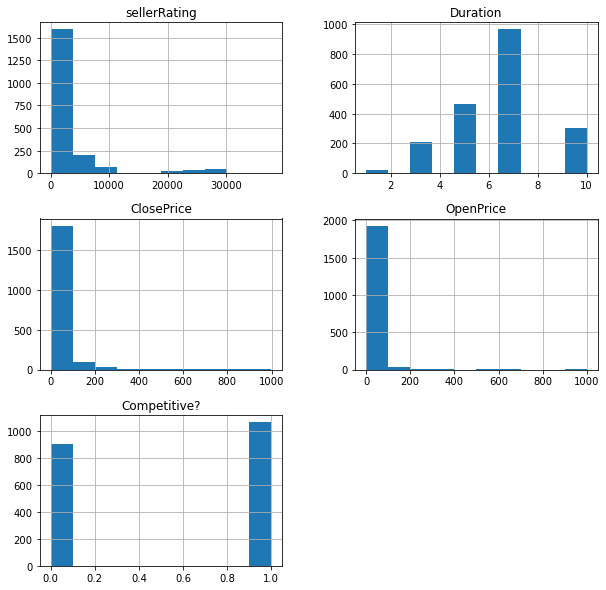

In [297]:
df[['Category', 'Currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?']].hist(sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(10,10))

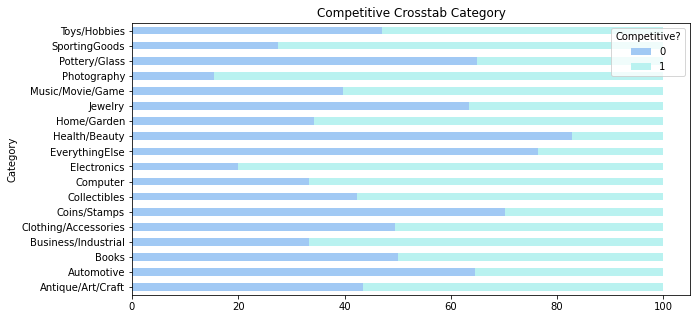

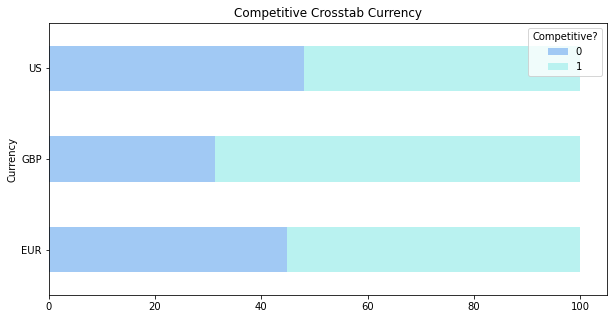

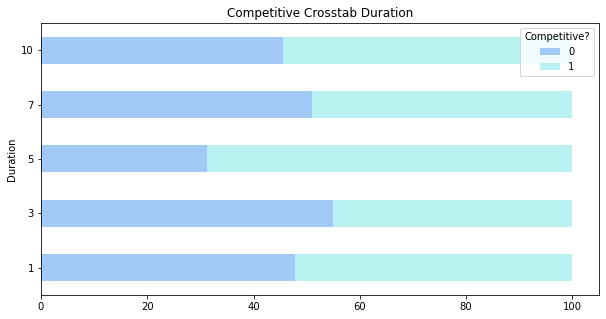

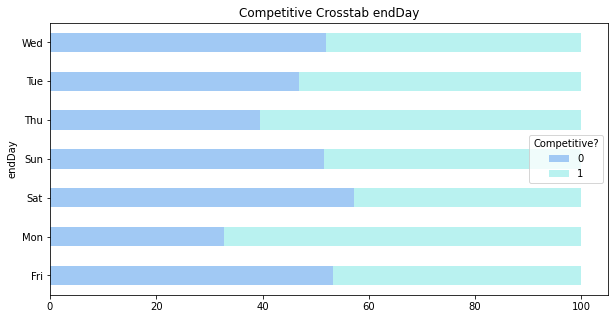

In [298]:
# Crosstab
plt.rcParams.update({'figure.max_open_warning': 0})
data = df[['Category', 'Currency', 'Duration', 'endDay',
       'Competitive?']]
            
for column in data.columns:
    if column != 'Competitive?':
        results = pd.crosstab(data['Competitive?'], data[column])
        results = results.transpose()
        results_normalized = results.div(results.sum(axis = 1), axis = 0) * 100
        
        colours = sns.color_palette('pastel', n_colors=10)
        cmap1 = LinearSegmentedColormap.from_list("my_colormap", colours)
        
        ax = results_normalized.plot(kind = 'barh', stacked = True, figsize = (10,5), colormap = cmap1)
        ax.set_title('Competitive Crosstab ' + column)    

# 2. Model Building

## 2.1 Decision Tree with all Predictors

In [299]:
seed = 84

In [300]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Category', 'Currency', 'endDay','Duration']]).toarray())
enc_df.columns = enc.get_feature_names_out(['Category', 'Currency', 'endDay','Duration'])
joined_df = df[['sellerRating', 'ClosePrice', 'OpenPrice']].join(enc_df)

In [301]:
X = joined_df
y = df["Competitive?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

In [302]:
X_train

,sellerRating,ClosePrice,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
1579,2993,17.51,14.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
581,1545,7.43,2.45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
989,686,6.50,6.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
620,3385,3.75,3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1352,541,10.75,9.99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,118,14.28,1.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1336,1853,12.30,12.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
857,286,33.82,1.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1777,361,31.00,31.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [303]:
fullClassTree = DecisionTreeClassifier(random_state = seed, min_samples_leaf = 50)
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=84)

In [304]:
y_predicted = fullClassTree.predict(X_test)

In [305]:
accuracy_score(y_test, y_predicted)

0.835234474017744

In [306]:
classificationSummary(y_train, fullClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.8555)

       Prediction
Actual   0   1
     0 493  45
     1 126 519


In [307]:
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8352)

       Prediction
Actual   0   1
     0 329  39
     1  91 330


In [308]:
fullClassTree.tree_.max_depth

6

In [309]:
fullClassTree.tree_.node_count

27

In [310]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 84,
 'splitter': 'best'}

In [311]:
first_tree_dot = export_graphviz(fullClassTree, out_file='first_tree.dot', 
                feature_names=X_train.columns, filled=True)

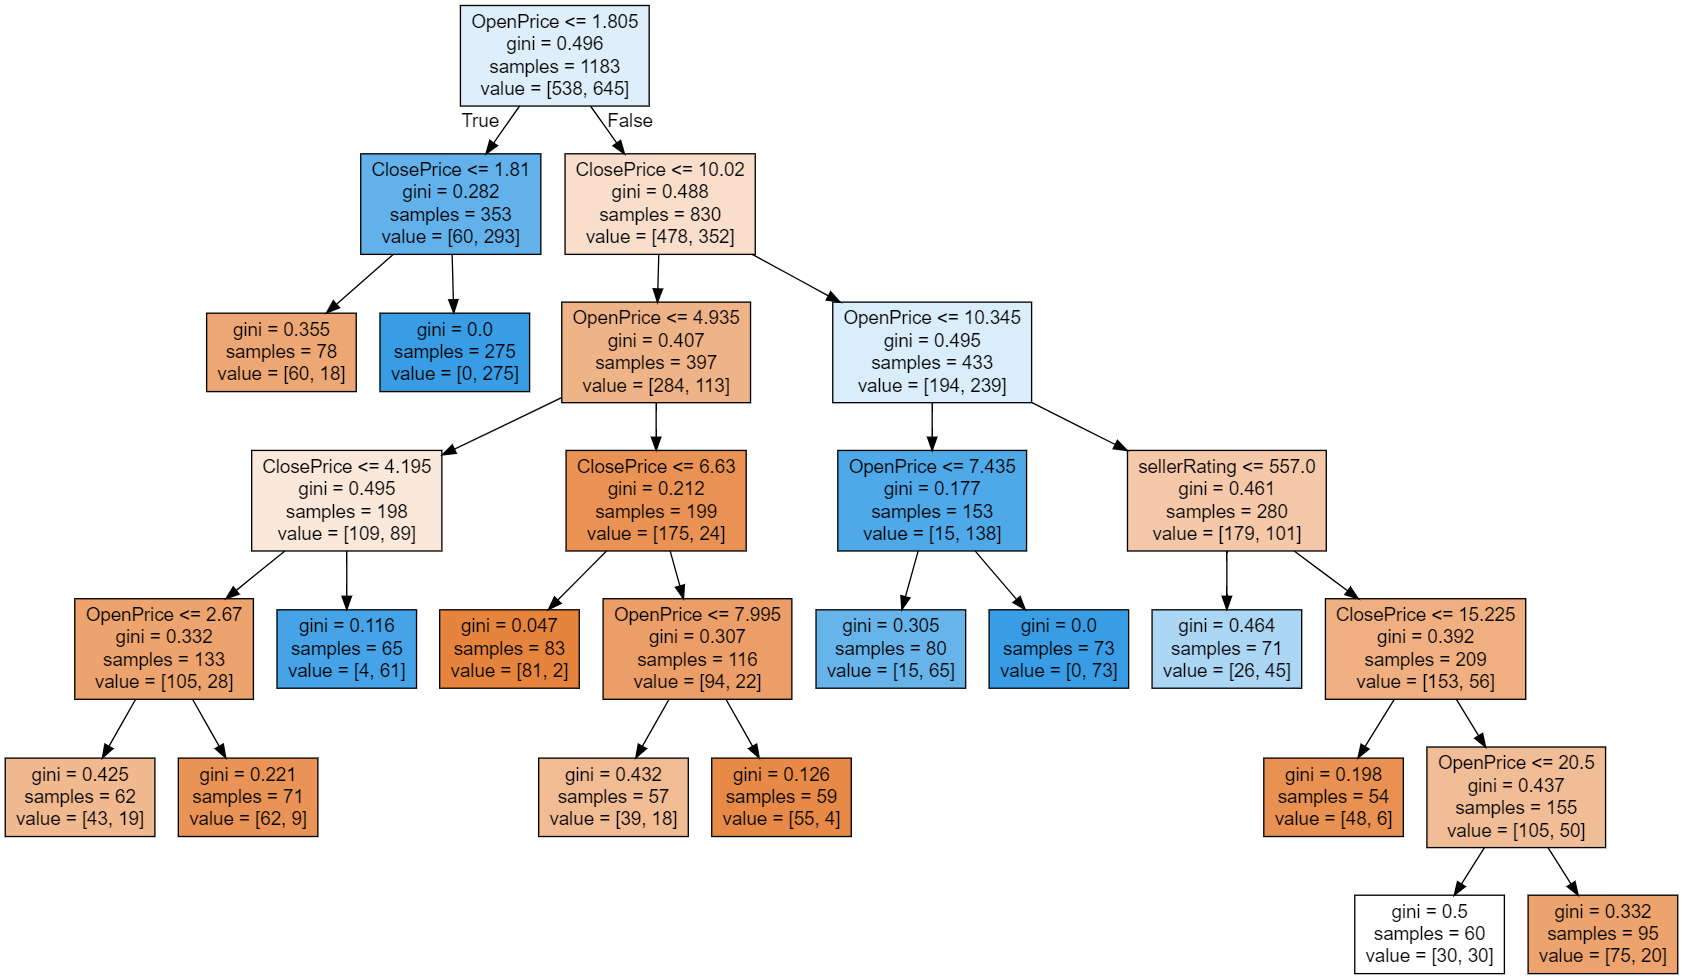

## 2.2 Decision Tree without Duration

In [312]:
# Only keep 'sellerRating', 'ClosePrice', 'OpenPrice'
joined_wo_duration_df = joined_df[['sellerRating', 'ClosePrice', 'OpenPrice']]

In [313]:
# joined_wo_duration_df = joined_df.drop(columns=['Duration_1', 'Duration_3', 'Duration_5', 'Duration_7', 'Duration_10'])

In [314]:
X = joined_wo_duration_df
y = df["Competitive?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

In [315]:
ClassTree_no_Duration = DecisionTreeClassifier(random_state = seed, min_samples_leaf = 50)
ClassTree_no_Duration.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=84)

In [316]:
y_predicted = ClassTree_no_Duration.predict(X_test)

In [317]:
accuracy_score(y_test, y_predicted)

0.835234474017744

In [318]:
classificationSummary(y_train, ClassTree_no_Duration.predict(X_train))

Confusion Matrix (Accuracy 0.8555)

       Prediction
Actual   0   1
     0 493  45
     1 126 519


In [319]:
classificationSummary(y_test, ClassTree_no_Duration.predict(X_test))

Confusion Matrix (Accuracy 0.8352)

       Prediction
Actual   0   1
     0 329  39
     1  91 330


In [320]:
ClassTree_no_Duration.tree_.max_depth

6

In [321]:
ClassTree_no_Duration.tree_.node_count

27

In [322]:
ClassTree_no_Duration.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 84,
 'splitter': 'best'}

In [323]:
tree_no_duration_dot = export_graphviz(ClassTree_no_Duration, out_file='tree_no_duration.dot', 
                feature_names=X_train.columns, filled=True)

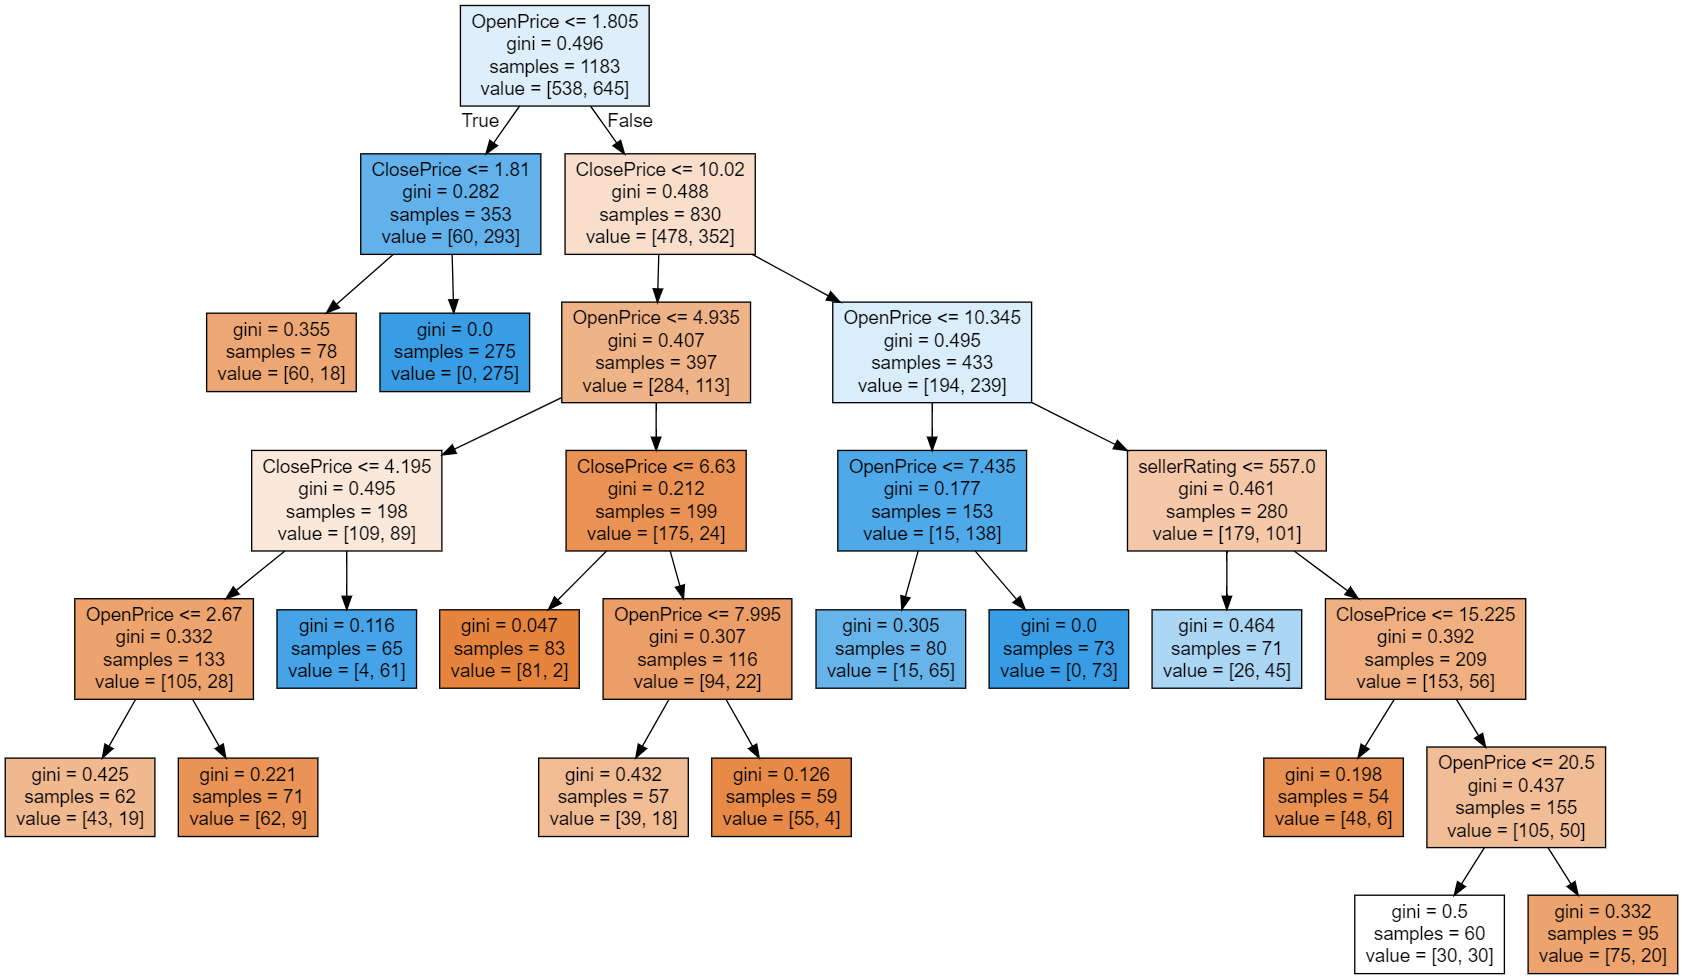

## 2.3 Decision Tree for new Auction

In [324]:
# Drop ClosePrice for practical reason
joined_new_auction_df = joined_df.drop(columns=['ClosePrice'])

In [325]:
# joined_new_auction_df = joined_df.drop(columns=['ClosePrice', 'endDay_Fri', 'endDay_Mon', 'endDay_Sat',
#        'endDay_Sun', 'endDay_Thu', 'endDay_Tue', 'endDay_Wed', 'Duration_1',
#        'Duration_3', 'Duration_5', 'Duration_7', 'Duration_10'])

In [326]:
# Split dataset
X = joined_new_auction_df
y = df["Competitive?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

In [327]:
# Build model
ClassTree_new_auction = DecisionTreeClassifier(random_state = seed, min_samples_leaf = 50)
ClassTree_new_auction.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=84)

In [328]:
# Predict
y_predicted = ClassTree_new_auction.predict(X_test)

In [329]:
accuracy_score(y_test, y_predicted)

0.7135614702154626

In [330]:
classificationSummary(y_train, ClassTree_new_auction.predict(X_train))

Confusion Matrix (Accuracy 0.7253)

       Prediction
Actual   0   1
     0 382 156
     1 169 476


In [331]:
classificationSummary(y_test, ClassTree_new_auction.predict(X_test))

Confusion Matrix (Accuracy 0.7136)

       Prediction
Actual   0   1
     0 260 108
     1 118 303


In [332]:
ClassTree_new_auction.tree_.max_depth

8

In [333]:
ClassTree_new_auction.tree_.node_count

37

In [334]:
ClassTree_new_auction.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 84,
 'splitter': 'best'}

In [335]:
tree_new_auction_dot = export_graphviz(ClassTree_new_auction, out_file='tree_new_auction.dot', 
                feature_names=X_train.columns, filled=True)

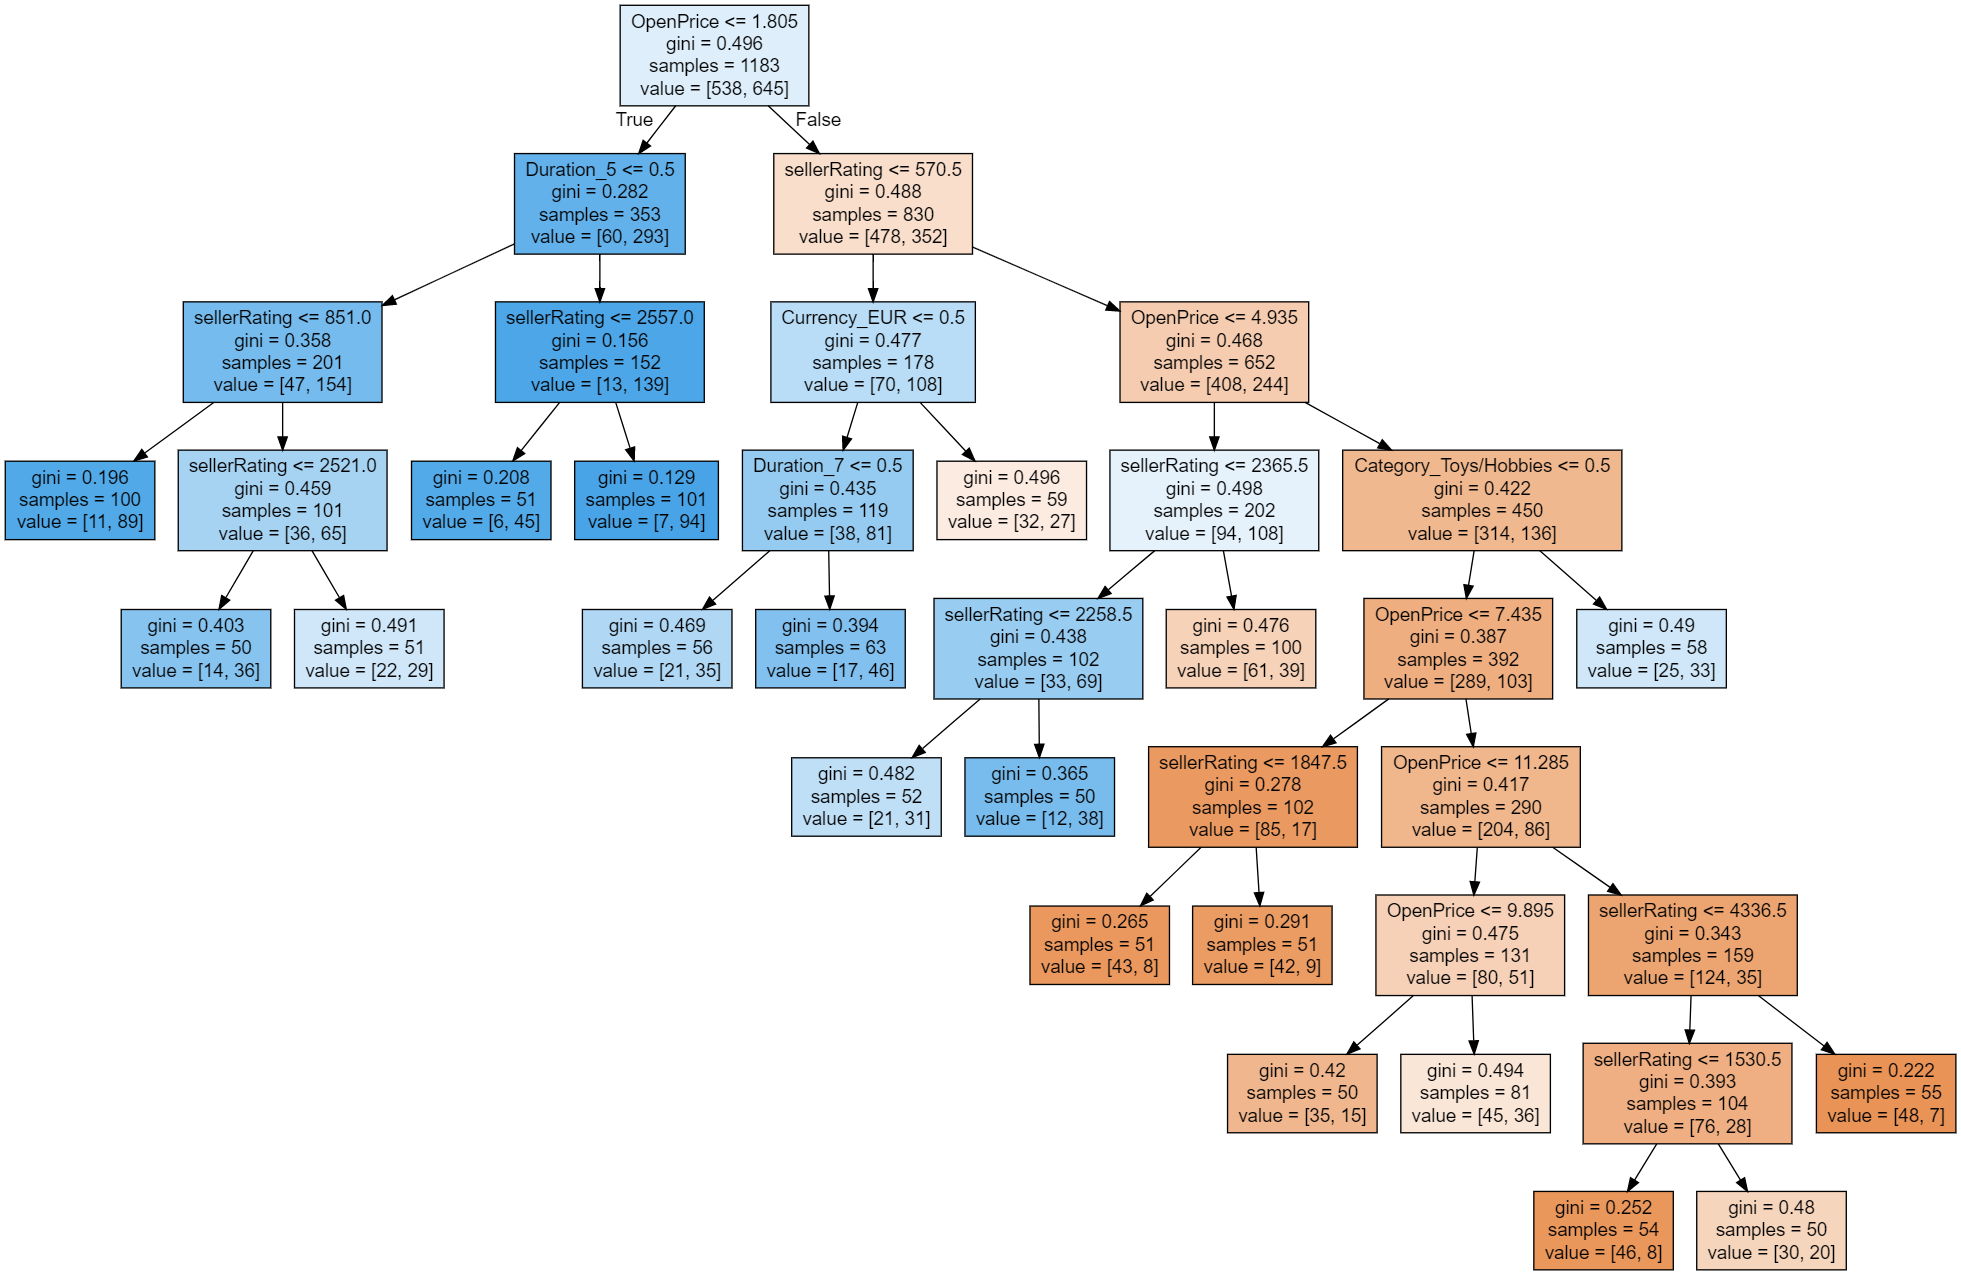

# 3. Scatter Plot

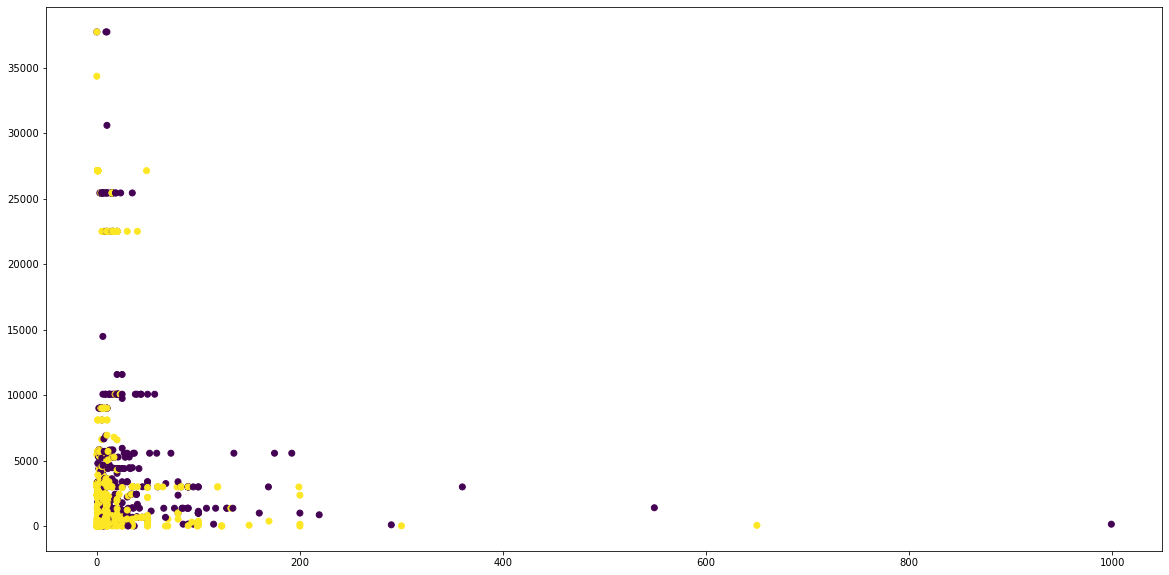

In [336]:
# OpenPrice vs sellerRating
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df['OpenPrice'], df['sellerRating'], c=df['Competitive?'], cmap='viridis')
# plt.xlim(-1, 50)
# plt.ylim(-1, 6000)
plt.show()

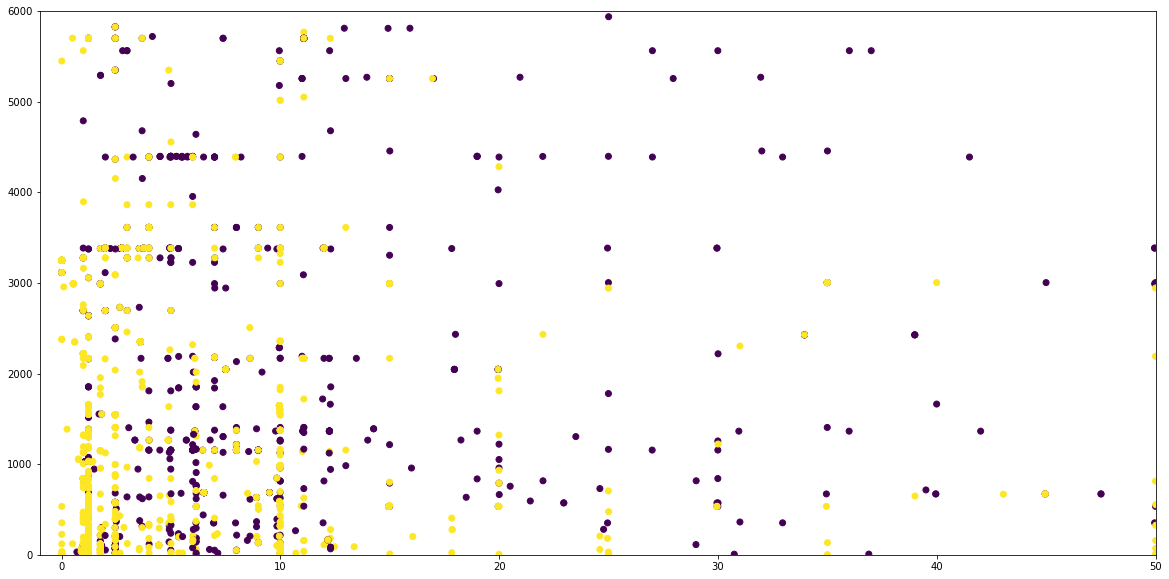

In [337]:
# Zoomed in
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df['OpenPrice'], df['sellerRating'], c=df['Competitive?'], cmap='viridis')
plt.xlim(-1, 50)
plt.ylim(-1, 6000)
plt.show()